In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%pylab inline

Populating the interactive namespace from numpy and matplotlib


$$\begin{equation}
v_{c}^{2} = \frac{G\pi\Sigma_{g}R^{2}}{R_{d}}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$
$$\begin{equation}
\frac{v_{c}^{2}R_{d}}{G\pi\Sigma_{g}} = R^{2}\int_{0}^{\pi/2}(\cos2u + 1)du\int_{0}^{\infty} d\beta exp(-\frac{R\cos u \cosh\beta}{2R_{d}} -\frac{R_{m}}{R\cos u \cosh\beta})(\frac{2R_{m}R_{d}}{R^{2}\cos^{2}u\cosh^{2}\beta} -1)
\end{equation}$$

$$\begin{equation}
v_{c}^{2} = \frac{4\pi G\Sigma_{g}R^{2}}{2R_{d}}\int_{0}^{1}ds\frac{s^{2}}{\sqrt{1-s^{2}}}\int_{1}^{\infty}dh \frac{e^{-\frac{Rsh}{2R_{d}}-\frac{R_{m}}{Rsh}}}{\sqrt{h^{2}-1}}\left( \frac{2R_{d}R_{m}}{R^{2}s^{2}h^{2}} - 1 \right)
\end{equation}$$

In [2]:
#Constants
G = 4.302e-6#kpc/SM(km/s)^2
q_b = 0.6
r_b = 1.9#kpc
a_b = 1.#kpc
q_h = 0.8
alpha_b = 1.8
R_m = 4.#kpc
#parameters model I
rho_b_I = 0.427e9#sM/kpc^3
a_h_I = 3.83#kpc
rho_h_I = 0.711e9#SM/kpc^3
alpha_h_I = -2.
beta_h_I = 2.96
R_d_I = 2.0#kpc
R_d_II = 3.2#kpc
Sigma_d_SD_I = (1905.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_I = (1905.0e6)*0.25#SM/kpc^2
#parameters model II
rho_b_II = 0.3e9#sM/kpc^3
a_h_II = 1.9#kpc
rho_h_II = 0.266e9#SM/kpc^3
alpha_h_II = 1.63
beta_h_II = 2.17
R_d_II = 3.2#kpc
Sigma_d_SD_II = (536.0e6)*0.75#SM/kpc^2
Sigma_g_ISM_II = (536.0e6)*0.25#SM/kpc^2

In [3]:
R = np.linspace(0.1,15.,100)

In [ ]:
def vc2_ISM(R,R_d,Sigma_g_ISM,R_m=R_m):
    def Int_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))
        t4 = (2.*R_m*R_d)/(R**2.*h**2.) - s**2.
        res = R**2.*t1*t2*t3*t4
        return res
    Integral_ISM = []
    for i in range(0,len(R)):
        integrando = lambda h,s: Int_ISM(h,s,R[i])
        result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM.append(result)
    return -4.*np.pi*G*Sigma_g_ISM*np.array(Integral_ISM)/(2.*R_d)

In [5]:
def vc2_ISM_I(h,s,R,R_d=R_d_I,R_m=R_m):
    t1 = 1./np.sqrt(1.-s**2.)
    t2 = 1./np.sqrt(h**2. - 1.)
    t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))
    t4 = (2.*R_m*R_d)/(R**2.*h**2.) - s**2.
    res = R**2.*t1*t2*t3*t4
    return res

In [6]:
Integ = []
for i in range (0,len(R)):
    integrando = lambda h,s: vc2_ISM_I(h,s,R[i])
    result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
    Integ.append(result)
print Integ

/Users/atalia/miniconda2/lib/python2.7/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


[0.0022032922812955306, 0.014082320851371932, 0.03759504295288965, 0.07607010383984217, 0.1322864178826217, 0.2045662548687354, 0.2871030572873858, 0.3725246893188333, 0.4539091357015693, 0.5257231390165441, 0.5840311653359817, 0.6263506403320434, 0.6513831532663833, 0.6587340993593556, 0.6486662415630994, 0.6218998553105853, 0.5794579135771909, 0.5225496892703804, 0.45248517242422914, 0.3706133594436808, 0.2782786433294339, 0.17679073222902164, 0.06740457134346749, -0.04869240645733982, -0.17038770462218866, -0.29664735909821843, -0.4265168140065935, -0.5591198954342682, -0.6936564886405715, -0.8293993565092674, -0.9656904271748801, -1.1019367747073936, -1.2376064832220892, -1.3722244792592369, -1.505368449369367, -1.6366648807158253, -1.7657852678881782, -1.892442507975462, -2.0163874974109692, -2.137405937047053, -2.255315336829234, -2.369962232219721, -2.4812195884166663, -2.588984396036149, -2.6931754431149404, -2.79373125811154, -2.890608207427051, -2.983778744270783, -3.07322979

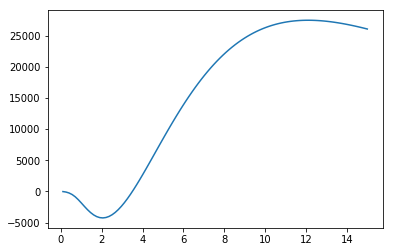

In [7]:
integ_array = np.array(Integ)
C_integ_I = -2.*np.pi*G*Sigma_g_ISM_I/R_d_I
plt.plot(R,C_integ_I*integ_array)

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


(0.0, 15.0)

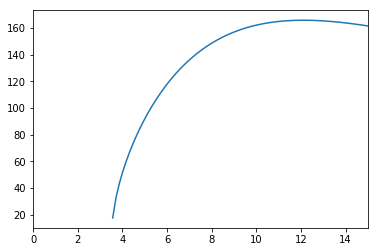

In [8]:
plt.plot(R,np.sqrt(C_integ_I*integ_array))
plt.xlim(0.,15.)

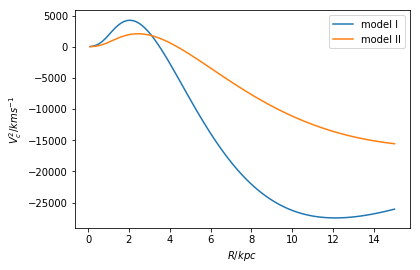

In [11]:
plt.plot(R,vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m),label='model I')
plt.plot(R,vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m),label='model II')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}^{2}/km s^{-1}$')
#plt.title(r'$V_{c}^{2}$)
plt.legend(loc='upper right', prop={'size':10})
#plt.savefig('Model_II.pdf')

/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.
/Users/atalia/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


(0.0, 15.0)

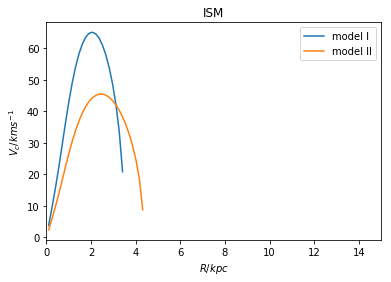

In [12]:
plt.plot(R,np.sqrt(vc2_ISM(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I,R_m=R_m)),label='model I')
plt.plot(R,np.sqrt(vc2_ISM(R,R_d=R_d_II,Sigma_g_ISM=Sigma_g_ISM_II,R_m=R_m)),label='model II')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('ISM')
plt.legend(loc='upper right', prop={'size':10})
plt.xlim(0.,15.)
#plt.savefig('Model_II.pdf')

# Y finalmente comparando con el modelo aproximado

In [ ]:
def M_g_I(u,R,R_d=2.,R_m=4.):
    return u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [ ]:
def V_c_g_I(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_I,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    V = l*Integral
    return V

In [ ]:
def vc2_ISM_ap(R,R_d,Sigma_g_ISM,R_m=R_m):
    def Int_ISM(h,s,R):
        t1 = 1./np.sqrt(1.-s**2.)
        t2 = 1./np.sqrt(h**2. - 1.)
        t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))#t4 = (2.*R_m*R_d)/(R**2.*h**2.) - s**2.
        res = R**2.*t1*t2*t3#*t4
        return res
    Integral_ISM = []
    for i in range(0,len(R)):
        integrando = lambda h,s: Int_ISM(h,s,R[i])
        result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
        Integral_ISM.append(result)
    return 4.*np.pi*G*Sigma_g_ISM*np.array(Integral_ISM)/(2.*R_d)

In [ ]:
plt.plot(R,vc2_ISM_ap(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I))

In [ ]:
Vc_I = np.sqrt(G*2.*np.pi*Sigma_g_ISM_I*V_c_g_I(R))
plt.plot(R,Vc_I,label='aprox')
plt.plot(R,np.sqrt(vc2_ISM_ap(R,R_d=R_d_I,Sigma_g_ISM=Sigma_g_ISM_I)),label='exact without t4')
plt.xlabel(r'$R/kpc$')
plt.ylabel(r'$V_{c}/km s^{-1}$')
plt.title('ISM model I')
plt.legend(loc='upper right', prop={'size':10})

In [ ]:
def vc2_v4_ISM_II(h,s,R,R_d=R_d_II,R_m=R_m):
    t1 = s**2./np.sqrt(1.-s**2.)
    t2 = 1./np.sqrt(h**2. - 1.)
    t3 = np.exp(-(R*s*h)/(2.*R_d) - (R_m)/(R*s*h))
    t4 = (2.*R_m*R_d)/(R**2.*s**2.*h**2.) - 1.
    res = R**2.*t1*t2*t3*t4
    return res

In [ ]:
Integ = []
for i in range (0,len(R)):
    integrando = lambda h,s: vc2_v4_ISM_II(h,s,R[i])
    result = integrate.dblquad(integrando,0.1,1.,lambda s: 1., lambda s: np.inf)[0]
    Integ.append(result)
print Integ

In [ ]:
integ_array_II = np.array(Integ)
C_integ_II = -2.*np.pi*G*Sigma_g_ISM_II/R_d_II
plt.plot(R,C_integ_II*integ_array_II)

In [ ]:
plt.plot(R,np.sqrt(C_integ_II*integ_array_II))
plt.xlim(0,15)

In [ ]:
def M_g_II(u,R,R_d=3.2,R_m=4.):
    return u*np.exp(-((R*u)/(2.*R_d))-(R_m/(R*u)))

In [ ]:
def V_c_g_II(l):
    Integral_M_g = []
    for i in range (0,len(l)):
        result = integrate.quad(M_g_II,0,1,args=(l[i]))[0]
        Integral_M_g.append(result)
    Integral = np.array(Integral_M_g)
    V = l*Integral
    return V

In [ ]:
Vc_II = np.sqrt(G*2.*np.pi*Sigma_g_ISM_II*V_c_g_II(R))
plt.plot(R,Vc_II)
plt.plot(R,np.sqrt(C_integ_II*integ_array_II))